# Machine Learning
# Assignment 1: Linear Regression

Please write your full name here
- **Name** : "Hasnaa Hossam Hassanein Hussein"

## Instructions
- Please place your code where you're asked to. Do not change any other code.
- Place your markdown answers inside the cells labelled "Answer".
- Submit the notebook with your solutions and keep the cell outputs.
- Please name your notebook in the following format "assignment1_FirstnameLastname.ipynb"
- Late submissions will be penalized.

## Remember

**Linear models**:\
Linear models make a prediction using a linear function of the input features $X$

$$f_{\mathbf{w}}(\mathbf{x}) = \sum_{i=1}^{p} w_i \cdot x_i + w_{0}$$

Learn $w$ from $X$, given a loss function $\mathcal{L}$:
$$\underset{\mathbf{w}}{\operatorname{argmin}} \mathcal{L}(f_\mathbf{w}(X))$$


**Regression**
* Prediction formula for input features x:
    * $w_1$ ... $w_p$ usually called _weights_ or _coefficients_ , $w_0$ the _bias_ or _intercept_

$$\hat{y} = \mathbf{w}\mathbf{x} + w_0 = \sum_{i=1}^{p} w_i \cdot x_i + w_0 = w_1 \cdot x_1 + w_2 \cdot x_2 + ... + w_p \cdot x_p + w_0 $$

**Ordinary Least Squares Linear regression**
* Loss function is the _sum of squared errors_ (SSE) (or residuals) between predictions $\hat{y}_i$ (red) and the true regression targets $y_i$ (blue) on the training set.
$$\mathcal{L}_{SSE} = \sum_{n=1}^{N} (y_n-\hat{y}_n)^2 = \sum_{n=1}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + w_0))^2$$

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/02_least_squares.png" alt="ml" style="margin: 0 auto; width: 550px;"/>

**Solving ordinary least squares**
* Convex optimization problem with unique closed-form solution:
$$w^{*} = (X^{T}X)^{-1} X^T Y$$
    * Slow for large number of features
    * Only works if inverse can be found
* _Gradient Descent_
    * Faster for large and/or high-dimensional datasets
    * When $X^{T}X$ cannot be computed or takes too long

**Ridge regression**
* Adds a penalty term to the least squares loss function:

$$\mathcal{L}_{Ridge} = \sum_{n=1}^{N} (y_n-(\mathbf{w}\mathbf{x_n}))^2 + \alpha \sum_{i=1}^{p} w_i^2$$

* Model is penalized if it uses large coefficients ($w$)
* Regularization: explicitly restrict a model to avoid overfitting.
    * Called L2 regularization because it uses the L2 norm: $\sum w_i^2$
* The strength of the regularization can be controlled with the $\alpha$ hyperparameter.
    * Increasing $\alpha$ causes more regularization (or shrinkage). Default is 1.0.
* Can be optimized in different ways:
    * Closed form solution
    * Gradient descent and variants
   

**Least Absolute Shrinkage and Selection Operator (LASSO) regression**
* Adds a different penalty term to the least squares sum:
$$\mathcal{L}_{Lasso} = \sum_{n=1}^{N} (y_n-(\mathbf{w}\mathbf{x_n} + w_0))^2 + \alpha \sum_{i=1}^{p} |w_i|$$
* Called L1 regularization because it uses the L1 norm
    * Will cause many weights to be exactly 0
* Same parameter $\alpha$ to control the strength of regularization.

## Questions

Here, we synthesize polynomial data and fit a polynomial linear regression model on the data. You can use the [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) function in scikit-learn.


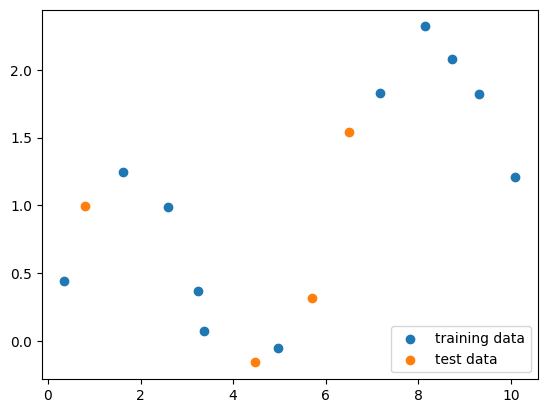

In [1]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)


plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4);

### Question 1.1.1
- Write a function that fits a LinearRegression model on the training data X_train.
- For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. np.linspace(0,10,100)) and store this in a numpy array. Your function should return this numpy array.

In [2]:
from sklearn.linear_model import LinearRegression

def LinReg():
    # your answer here
    reg = LinearRegression().fit(X_train.reshape(-1,1), y_train)
    x_pred = np.linspace(0,10,100).reshape(-1,1)
    results = reg.predict(x_pred)
    return results

In [3]:
results = LinReg()
print(results.shape)

(100,)


In [4]:
print(results)

[0.2530402  0.26920155 0.2853629  0.30152425 0.3176856  0.33384695
 0.35000831 0.36616966 0.38233101 0.39849236 0.41465371 0.43081507
 0.44697642 0.46313777 0.47929912 0.49546047 0.51162182 0.52778318
 0.54394453 0.56010588 0.57626723 0.59242858 0.60858994 0.62475129
 0.64091264 0.65707399 0.67323534 0.6893967  0.70555805 0.7217194
 0.73788075 0.7540421  0.77020345 0.78636481 0.80252616 0.81868751
 0.83484886 0.85101021 0.86717157 0.88333292 0.89949427 0.91565562
 0.93181697 0.94797832 0.96413968 0.98030103 0.99646238 1.01262373
 1.02878508 1.04494644 1.06110779 1.07726914 1.09343049 1.10959184
 1.1257532  1.14191455 1.1580759  1.17423725 1.1903986  1.20655995
 1.22272131 1.23888266 1.25504401 1.27120536 1.28736671 1.30352807
 1.31968942 1.33585077 1.35201212 1.36817347 1.38433482 1.40049618
 1.41665753 1.43281888 1.44898023 1.46514158 1.48130294 1.49746429
 1.51362564 1.52978699 1.54594834 1.56210969 1.57827105 1.5944324
 1.61059375 1.6267551  1.64291645 1.65907781 1.67523916 1.691400

### Fitted model plot

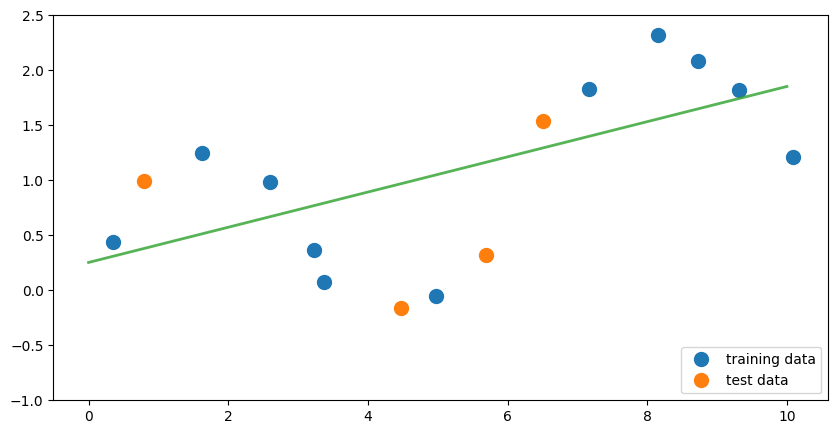

In [5]:
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    plt.plot(np.linspace(0,10,100), degree_predictions, alpha=0.8, lw=2)
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(LinReg())

### Question 1.1.2
Comment on the figure above in terms of fitting the data.

**ANSWER**

The Linear model underfits the data. because the data isn't in a linear form.

### Notes on Polynomial Regression

- Sometimes the relationship between the independent variable (input) and the dependent variable (output) is not linear. In this case, **Polynomial regression** is used, which provides flexibility by fitting a polynomial equation to the data. The general equation becomes:
$$y=\omega_0 + \omega_1 x + \omega_2 x^2 + ....... + \omega_n x^n $$
- **Steps**:
    - Use [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) function in scikit-learn to create polynomial features (see documentation for details and examples on usage).
    - Use `LinearRegression` to fit a linear model on the polynomial data.

### Question 1.2.1
- Write a function that fits a polynomial LinearRegression model on the training data X_train for degrees **1, 2, 3, 6, and 9**. (Use `PolynomialFeatures` in `sklearn.preprocessing` to create the polynomial features and then fit a linear regression model)
- For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. np.linspace(0,10,100)) and store this in a numpy array. Your function should return this array.
- The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 2, the third row degree 3, the fourth row degree 6, and the fifth row degree 9.

In [6]:
from sklearn.preprocessing import PolynomialFeatures

def PolyReg():
    x_pred = np.linspace(0,10,100).reshape(-1,1)
    results =[]
    degrees = [1,2,3,6,9]

    for degree in degrees:
      poly = PolynomialFeatures(degree)
      X_train_poly = poly.fit_transform(X_train.reshape(-1,1))

      reg = LinearRegression().fit(X_train_poly, y_train)

      x_pred_poly = poly.transform(x_pred)
      results.append(reg.predict(x_pred_poly))

    return np.array(results)

In [7]:
results = PolyReg()
print(results.shape)

(5, 100)


In [8]:
print(results)

[[ 2.53040195e-01  2.69201547e-01  2.85362899e-01  3.01524251e-01
   3.17685603e-01  3.33846955e-01  3.50008306e-01  3.66169658e-01
   3.82331010e-01  3.98492362e-01  4.14653714e-01  4.30815066e-01
   4.46976417e-01  4.63137769e-01  4.79299121e-01  4.95460473e-01
   5.11621825e-01  5.27783177e-01  5.43944529e-01  5.60105880e-01
   5.76267232e-01  5.92428584e-01  6.08589936e-01  6.24751288e-01
   6.40912640e-01  6.57073992e-01  6.73235343e-01  6.89396695e-01
   7.05558047e-01  7.21719399e-01  7.37880751e-01  7.54042103e-01
   7.70203454e-01  7.86364806e-01  8.02526158e-01  8.18687510e-01
   8.34848862e-01  8.51010214e-01  8.67171566e-01  8.83332917e-01
   8.99494269e-01  9.15655621e-01  9.31816973e-01  9.47978325e-01
   9.64139677e-01  9.80301028e-01  9.96462380e-01  1.01262373e+00
   1.02878508e+00  1.04494644e+00  1.06110779e+00  1.07726914e+00
   1.09343049e+00  1.10959184e+00  1.12575320e+00  1.14191455e+00
   1.15807590e+00  1.17423725e+00  1.19039860e+00  1.20655995e+00
   1.22272

### Fitted model plot

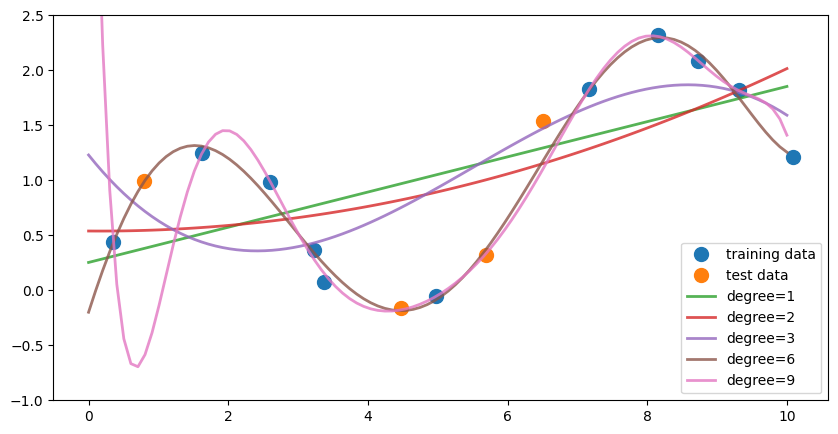

In [9]:
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,2,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(PolyReg())

### Question 1.2.2
Comment on the figure above in 2 lines in terms of fitting the data.

**ANSWER**

The first and second-degree models underfit the data, and possibly the third-degree model as well, while the ninth-degree model overfits the data. The sixth-degree model seems to fit the data well.

### Question 2
- Write a function that fits a polynomial `LinearRegression` model on the training data `X_train` for degrees 0 through 9.
- For each model compute the $R^2$ regression score on the **training data** as well as the the **test data**, and return both of these arrays in a tuple.

- *This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [10]:
from sklearn.metrics import r2_score

def answer_two():

    r2_train, r2_test = [], []

    for degree in range(0,10):
        poly = PolynomialFeatures(degree)

        X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
        X_test_poly = poly.transform(X_test.reshape(-1, 1))

        model = LinearRegression().fit(X_train_poly, y_train)

        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        r2_train.append(r2_score(y_train, y_train_pred))
        r2_test.append(r2_score(y_test, y_test_pred))

    return (np.array(r2_train),np.array(r2_test))

In [11]:
results = answer_two()
print(results[0].shape,results[1].shape)

(10,) (10,)


In [12]:
print(results)

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
       0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]), array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
        0.87708301,  0.9214094 ,  0.92021504,  0.63247948, -0.64525365]))


### Question 3
- Plot $R^2$ scores at degrees from 0 to 9 for both training and testing data on the same plot.

- The plot must contain a legend and appropriate names for the axes.

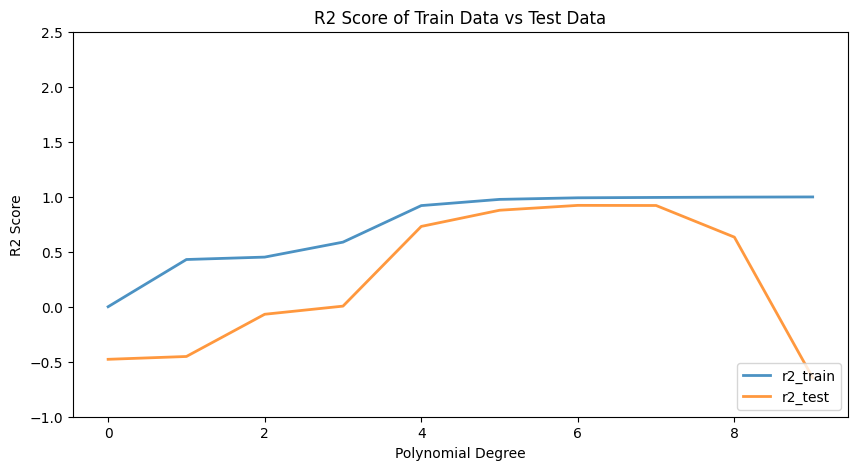

In [13]:
import matplotlib.pyplot as plt

def plot_r2_score(r2_scores):
    r2_train, r2_test = r2_scores
    degrees = np.arange(10)
    plt.figure(figsize=(10,5))

    plt.plot(degrees, r2_train, alpha=0.8, lw=2, label='r2_train')
    plt.plot(degrees, r2_test, alpha=0.8, lw=2, label='r2_test')

    plt.ylim(-1,2.5)
    plt.legend(loc=4)

    plt.xlabel("Polynomial Degree")
    plt.ylabel("R2 Score")
    plt.title("R2 Score of Train Data vs Test Data")

plot_r2_score(answer_two())

Based on the $R^2$ scores (degree levels 0 through 9), which degree levels correspond to a model that is **underfitting**? Which degree levels correspond to a model that is **overfitting**? What choice of degree level would provide a model with **good generalization** performance on this dataset?

**ANSWER**

**Underfitting** degrees is: **0, 1, 2, 3** <br>
**Overfitting** degrees is: **8, 9** <br>
**Good** degrees is: **4, 5, 6, 7** (**4 is not as good as 5,6,7**) <br>

### Question 4

- Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity.

- For this question, train three models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`), and a regularized Ridge Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 50.
- Return the $R^2$ score for both the LinearRegression, Lasso, Ridge model's test sets.


*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score, Ridge_R2_test_score)`*

In [14]:
from sklearn.linear_model import Lasso, Ridge

def answer_four():

    poly = PolynomialFeatures(50)

    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_poly = poly.transform(X_test.reshape(-1, 1))
    model = LinearRegression().fit(X_train_poly, y_train)
    y_test_pred = model.predict(X_test_poly)
    linear_r2_test = r2_score(y_test, y_test_pred)

    lasso_model = Lasso(alpha=0.01, max_iter=10000)
    lasso_model.fit(X_train_poly, y_train)
    y_test_lasso_pred = lasso_model.predict(X_test_poly)
    lasso_r2_test = r2_score(y_test, y_test_lasso_pred)

    ridge_model = Ridge(alpha=0.01, max_iter=10000)
    ridge_model.fit(X_train_poly, y_train)
    y_test_ridge_pred = ridge_model.predict(X_test_poly)
    ridge_r2_test = r2_score(y_test, y_test_ridge_pred)

    return (linear_r2_test, lasso_r2_test, ridge_r2_test)

In [15]:

results = answer_four()
print(results)


(0.006953559711665225, 0.8493908995296351, -0.08938086200465722)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.140e-01, tolerance: 6.895e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


**Comment on the results**
- which is better?
- what's the difference between the models in results and data fit?
- how do the weight values differ between the models?

**ANSWER**

**Answer Q1:**  
**Lasso** is the best, because it has the heighest R2 score.<br>
<br>

**Answer Q2:**  
**Linear model** overfited the data due to the high degree (50). <br>
**Lasso model** reduces the overfitting due to feature selection (shrinks some weights to zero). <br>
**Ridge model** shrinks weights but doesn't remove them. It also underfits the data. <br>
<br>


**Answer Q3:**  
**Linear model** has large coefficients due to overfitting. <br>
**Lasso model** some weights set to zero removing unimportat features, makes the model simpler. <br>
**Ridge model** all weights are small but not zero, It reduces large weights more than small weights. <br><br>




### Question 5
Write a function to calculate the total mean square error.
$$
MSE = E[ (ytrue  - yhat)^2 ]
$$

**Then compare your results with scikit-learn implementation of mean square error on the example provided below:**

In [16]:
y_true = [2, -0.8, 1, 7.5]
y_pred = [2.5, 0.0, 1, 8]

In [17]:
def mse(y_true, y_pred):

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    error = np.mean((y_true - y_pred)**2)

    return error

In [18]:
from sklearn.metrics import mean_squared_error

my_mse = mse(y_true, y_pred)
print(f"My Solution: {my_mse}")

scikit_learn_mse = mean_squared_error(y_true, y_pred)
print(f"Scikit-learn Solution: {scikit_learn_mse}")

My Solution: 0.28500000000000003
Scikit-learn Solution: 0.28500000000000003


### Question 6
Implement a linear regression class **FROM SCRATCH** that can be used by one of the following three options (according to user's choice):
1. Ordinary Linear Regression Class
2. Implement Ridge Regression Class
3. Implement Lasso Regression Class

- Can use numpy
- Complete the missing code

**Help**

The gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w_k := w_k -  \alpha \frac{\partial J(w,b)}{\partial w_k} \tag{1}  \; &
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where for **LINEAR REGRESSION**
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w_k}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}_k \tag{3}
$$
    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `update_weights` which calculates $\frac{\partial J(w)}{\partial w_k}$, $\frac{\partial J(w)}{\partial b}$ for each type of regression --> different gradients for each type


For example for **Linear Regression**, the `updat_weights` function should:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example
    $$
    f_{wb}(x^{(i)}) =  \sum_{k=1}^{k=m}w_kx^{(i)} + b
    $$
   
    * Loop over features $k$ and calculate the gradient for each parameter $w_k$
        $$
        \frac{\partial J(w,b)}{\partial w_k}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}_k
        $$
    * Then for $b$ from that example
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)})
        $$

* Calculate the total gradient update from all the examples for each parameter $w_k$ and $b$
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w_k}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} \frac{\partial J(w,b)}{\partial w_k}^{(i)}
    $$
  * Here, $n$ is the number of training examples and $\sum$ is the summation operator

* Then update weights

In [124]:
import numpy as np

# Linear Regression

class LinearRegression() :

    def __init__( self, learning_rate, iterations, type="linear" , reg_parameter = 0) :
        """
        This function initializes the object instance with arguments learning_rate, number of iterations, and whether to use linear or ridge or lasso
        reg_paramter is lambda for regularized regression"""

        self.learning_rate = learning_rate

        self.iterations = iterations

        self.type = type

        self.lam = reg_parameter

    def fit( self, X, Y ) :
        self.m, self.n = X.shape

        # weight initialization, initialize w to random numbers from a uniform distribution over [0,1(
        self.W = np.random.randint(0, 1, self.n)

        # intialize b to 0

        self.b = 0


        self.X = X


        self.Y = Y

        # gradient descent learning

        for i in range( self.iterations ) :

            self.update_weights()

        return self

    def update_weights( self ) :

        Y_pred = self.predict( self.X )

        # calculate gradients
        if self.type == 'linear':
            dW = (1 / self.m) * np.dot(self.X.T, (Y_pred - self.Y))

            db = (1 / self.m) * np.sum(Y_pred - self.Y)

        elif self.type == 'ridge':
            dW = (1 / self.m) * (np.dot(self.X.T, (Y_pred - self.Y)) + 2 * self.lam * self.W)

            db = (1 / self.m) * np.sum(Y_pred - self.Y)
        else:
            dW = (1 / self.m) * (np.dot(self.X.T, (Y_pred - self.Y))  + self.lam * np.sign(self.W))

            db = (1 / self.m) * np.sum(Y_pred - self.Y)

        # update weights
        self.W = self.W - self.learning_rate * dW

        self.b = self.b - self.learning_rate * db

        # you don't need to return w and b
        return self

    def predict( self, X ) :
        if self.type == 'linear':
            y_pred = np.dot(X,self.W) + self.b
        elif self.type == 'ridge':
            y_pred = np.dot(X,self.W) + self.b

        else:
            y_pred = np.dot(X,self.W) + self.b
        return y_pred

- **Train your 3 models on the simulated train data provided at the beginning of the assignment**
- use alpha = 0.02, learning_rate = 0.01, iterations = 600

In [125]:
# your answer here
model_linear = LinearRegression(learning_rate=0.01, iterations=600,type="linear", reg_parameter=0.02)
model_linear.fit(X_train.reshape(-1, 1),y_train)

model_ridge = LinearRegression(learning_rate=0.01, iterations=600,type="ridge", reg_parameter=0.02)
model_ridge.fit(X_train.reshape(-1, 1),y_train)

model_lasso = LinearRegression(learning_rate=0.01, iterations=600,type="lasso", reg_parameter=0.02)
model_lasso.fit(X_train.reshape(-1, 1),y_train)

- **Test your 3 models on the simulated test data provided at the beginning of the assignment**
- **Print the MSE for each model**

In [126]:
# your answer here
y_pred_linear = model_linear.predict(X_test.reshape(-1,1))
print(f"MSE Linear Model: {mse(y_test, y_pred_linear)}")

y_pred_ridge = model_ridge.predict(X_test.reshape(-1,1))
print(f"MSE Ridge Model: {mse(y_test, y_pred_ridge)}")

y_pred_lasso = model_lasso.predict(X_test.reshape(-1,1))
print(f"MSE Lasso Model: {mse(y_test, y_pred_lasso)}")
print("")

print(f"R2 score Linear Model: {r2_score(y_test, y_pred_linear)}")
print(f"R2 score Ridge Model: {r2_score(y_test, y_pred_ridge)}")
print(f"R2 score Lasso Model: {r2_score(y_test, y_pred_lasso)}")


MSE Linear Model: 0.6065165426601554
MSE Ridge Model: 0.6064602049734344
MSE Lasso Model: 0.6063474482552035

R2 score Linear Model: -0.4508773511588118
R2 score Ridge Model: -0.45074258307264925
R2 score Lasso Model: -0.450472852311548
